# Import Libraries

In [191]:
import pandas as pd
import numpy as np 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve

from sklearn.metrics import roc_curve,precision_score,precision_recall_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import pickle,json
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [14]:
df = pd.read_excel("Data.xlsx")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
df.tail()

# Detail Information About The Dataset

In [192]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pandas_profiling import ProfileReport

report = ProfileReport(df)
report

In [ ]:
#we get almost all info related to data
# missing value % ,Duplicate %,Distinct%,Duplicate rows
# univariate analysis,Bivariate analysis
# various Corr graph ,Histogram,Barplot

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df_original_size = len(df)
print ("-->",df_original_size,"Observations")

--> 2240 Observations


In [8]:
def get_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object'])
    return categorical_columns

In [9]:
cat_features = get_categorical_columns(df)
cat_features

Education Marital_Status Dt_Customer
0     Graduation         Single  2012-09-04
1     Graduation         Single  2014-03-08
2     Graduation       Together  2013-08-21
3     Graduation       Together  2014-02-10
4            PhD        Married  2014-01-19
...          ...            ...         ...
2235  Graduation        Married  2013-06-13
2236         PhD       Together  2014-06-10
2237  Graduation       Divorced  2014-01-25
2238      Master       Together  2014-01-24
2239         PhD        Married  2012-10-15

[2240 rows x 3 columns]

# --> Graph for cat features


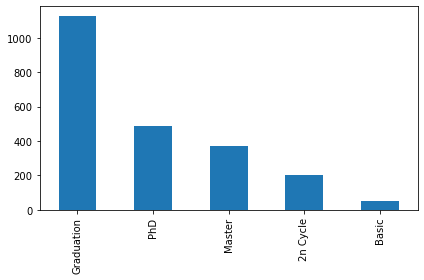

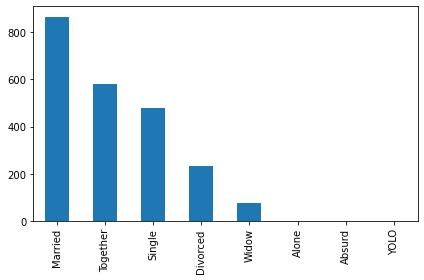

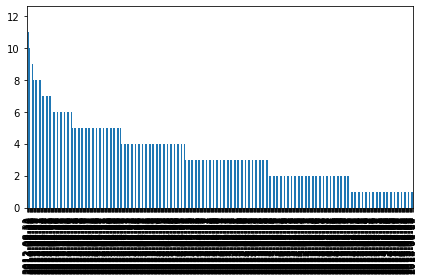

In [10]:
#barplot

for i in cat_features:
    df[i].value_counts().plot(kind='bar')
    plt.tight_layout()
    plt.show()

# >>> Graph For Continuous Features

In [11]:
# Continuous features

def get_cont_columns(df):
    cont_columns = df.select_dtypes(exclude=['object'])
    return cont_columns

In [12]:
cont_features = get_cont_columns(df)
cont_features

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0      5524        1957  58138.0        0         0       58       635   
1      2174        1954  46344.0        1         1       38        11   
2      4141        1965  71613.0        0         0       26       426   
3      6182        1984  26646.0        1         0       26        11   
4      5324        1981  58293.0        1         0       94       173   
...     ...         ...      ...      ...       ...      ...       ...   
2235  10870        1967  61223.0        0         1       46       709   
2236   4001        1946  64014.0        2         1       56       406   
2237   7270        1981  56981.0        0         0       91       908   
2238   8235        1956  69245.0        0         1        8       428   
2239   9405        1954  52869.0        1         1       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
0            88              546              172  ...                  7   
1             1                6                2  ...                  5   
2            49              127              111  ...                  4   
3             4               20               10  ...                  6   
4            43              118               46  ...                  5   
...         ...              ...              ...  ...                ...   
2235         43              182               42  ...                  5   
2236          0               30                0  ...                  7   
2237         48              217               32  ...                  6   
2238         30              214               80  ...                  3   
2239          3               61                2  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 26 columns]

In [13]:
cont_features = ['ID', 'Year_Birth','Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

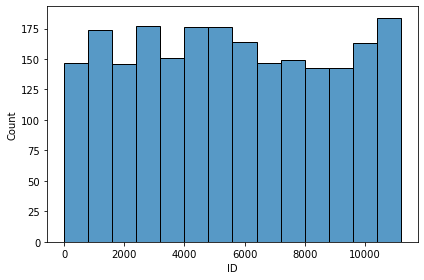

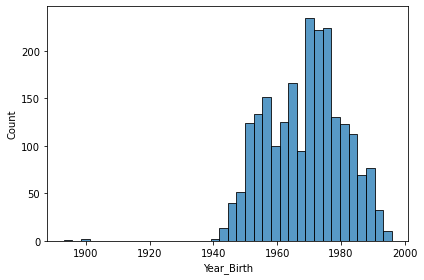

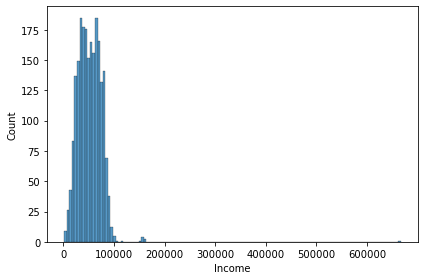

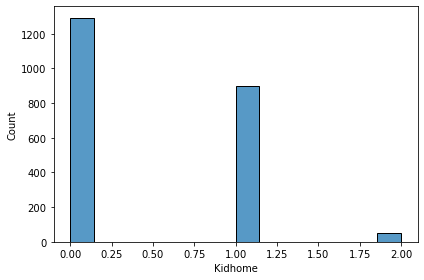

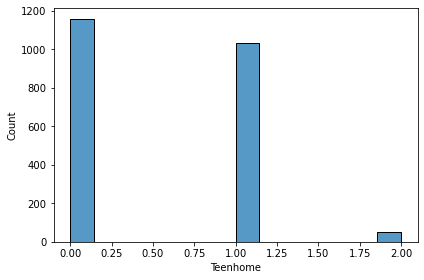

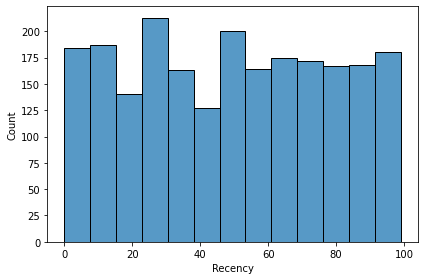

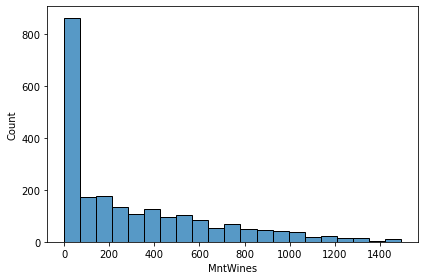

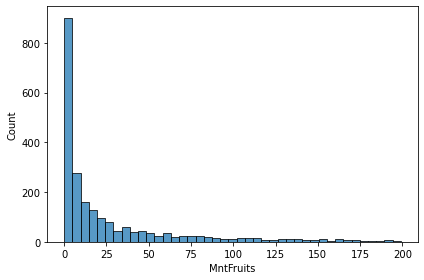

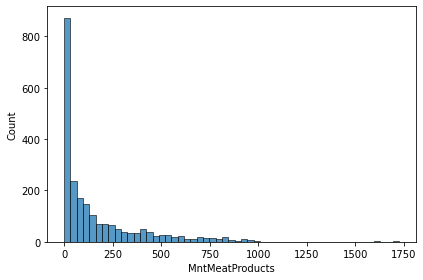

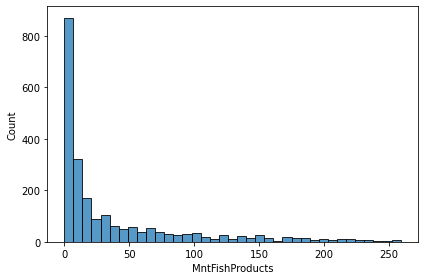

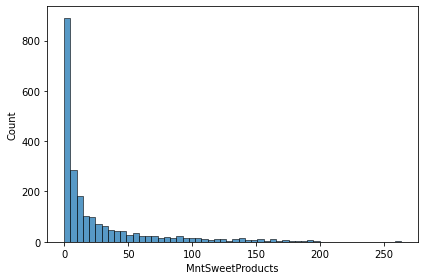

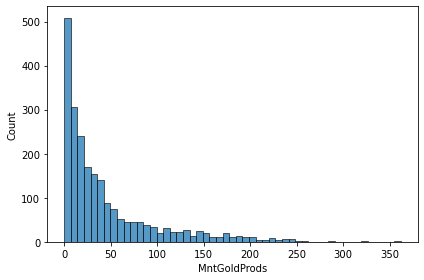

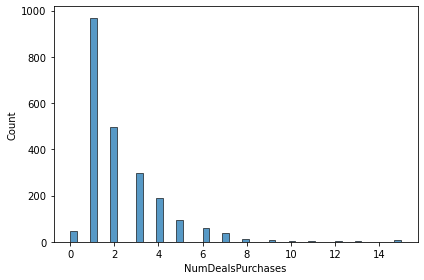

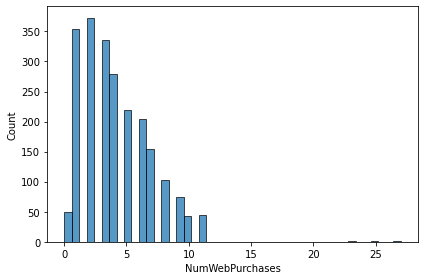

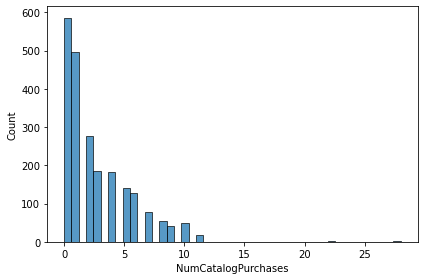

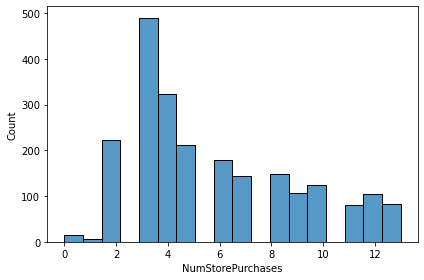

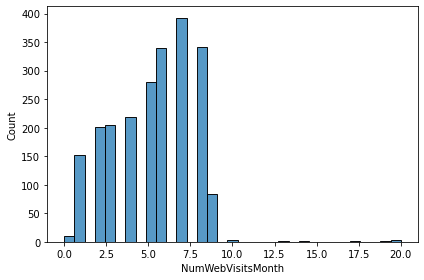

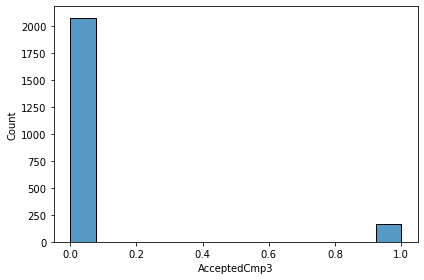

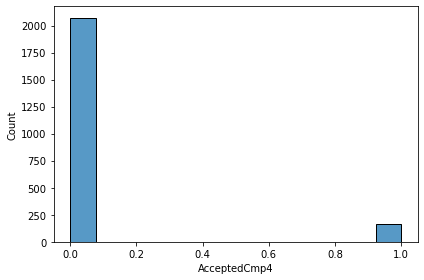

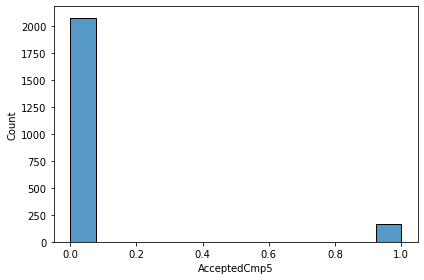

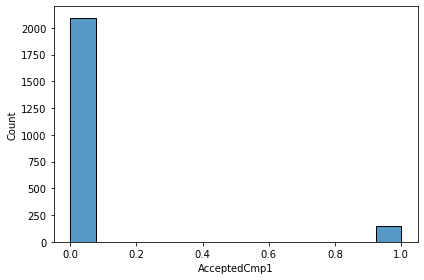

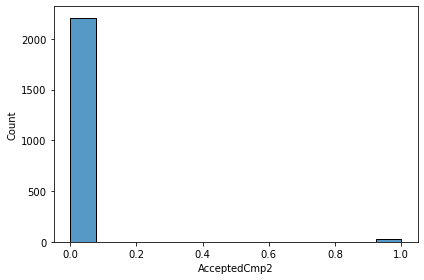

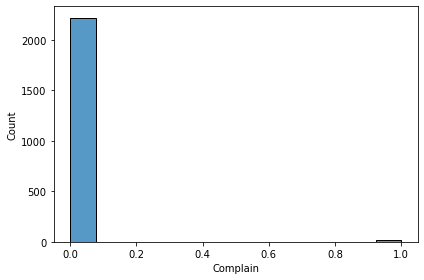

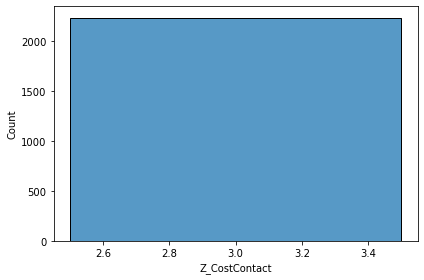

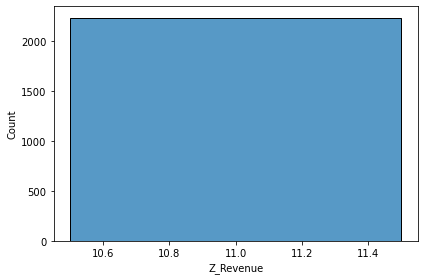

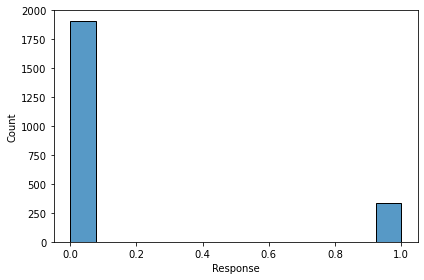

In [14]:
# histigram for continuous features
for i in cont_features:
    sns.histplot(df[i])
    plt.tight_layout()
    plt.show()

# Vizualiztize the realtion of all features in target column

<AxesSubplot:xlabel='ID', ylabel='count'>

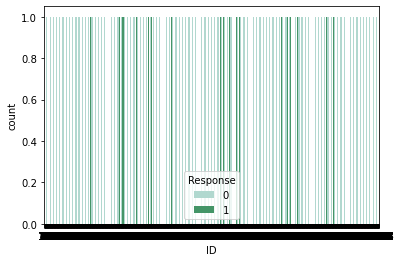

In [18]:
sns.countplot(x=df['ID'],hue=df['Response'],palette='BuGn')

<AxesSubplot:xlabel='Year_Birth', ylabel='count'>

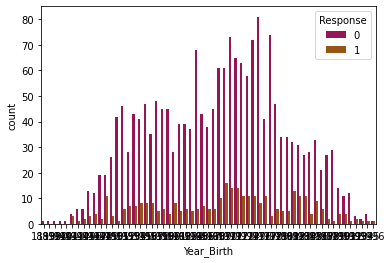

In [20]:
sns.countplot(x=df['Year_Birth'],hue=df['Response'],palette='brg')

<AxesSubplot:xlabel='Income', ylabel='count'>

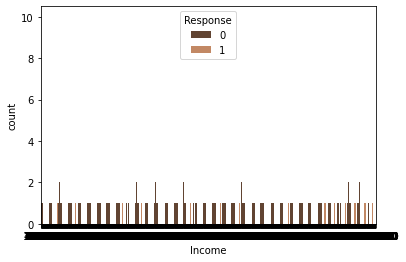

In [21]:
sns.countplot(x=df['Income'],hue=df['Response'],palette='copper')

<AxesSubplot:xlabel='Kidhome', ylabel='count'>

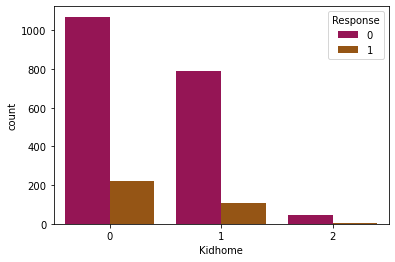

In [22]:
sns.countplot(x=df['Kidhome'],hue=df['Response'],palette='brg')

<AxesSubplot:xlabel='Teenhome', ylabel='count'>

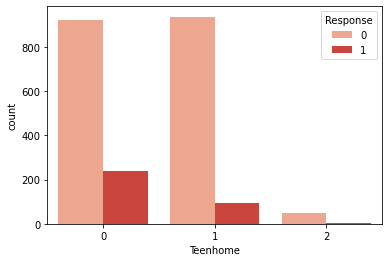

In [23]:
sns.countplot(x=df['Teenhome'],hue=df['Response'],palette='Reds')

<AxesSubplot:xlabel='Recency', ylabel='count'>

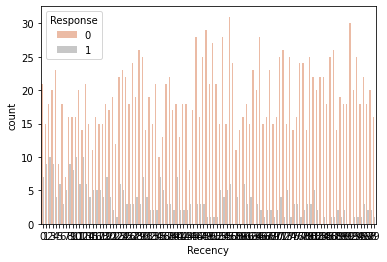

In [24]:
sns.countplot(x=df['Recency'],hue=df['Response'],palette='RdGy')

<AxesSubplot:xlabel='MntWines', ylabel='count'>

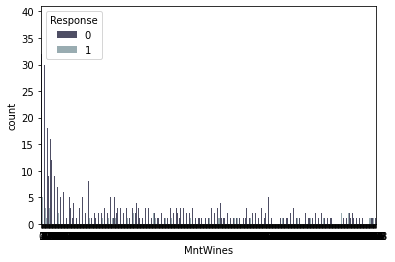

In [25]:
sns.countplot(x=df['MntWines'],hue=df['Response'],palette='bone')

<AxesSubplot:xlabel='MntFruits', ylabel='count'>

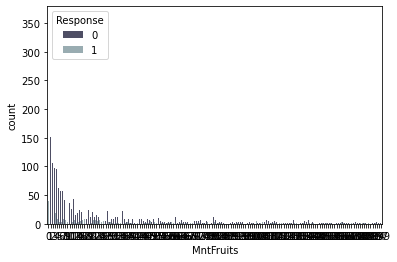

In [22]:
sns.countplot(x=df['MntFruits'],hue=df['Response'],palette='bone')

<AxesSubplot:xlabel='MntMeatProducts', ylabel='count'>

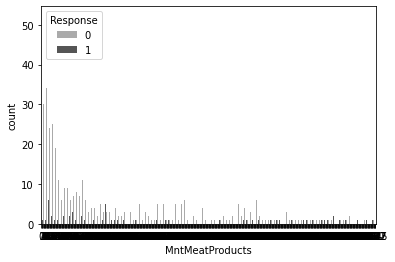

In [23]:
sns.countplot(x=df['MntMeatProducts'],hue=df['Response'],palette='binary')

<AxesSubplot:xlabel='MntFishProducts', ylabel='count'>

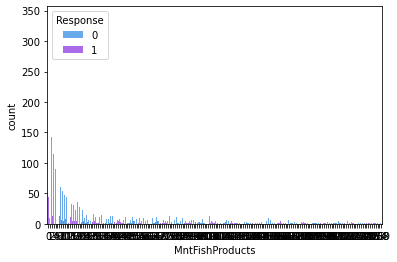

In [24]:
sns.countplot(x=df['MntFishProducts'],hue=df['Response'],palette='cool')

<AxesSubplot:xlabel='MntSweetProducts', ylabel='count'>

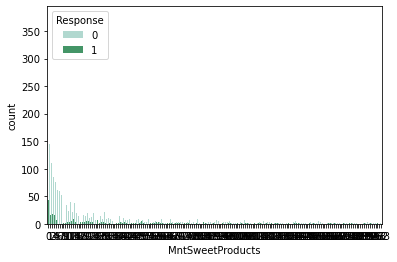

In [25]:
sns.countplot(x=df['MntSweetProducts'],hue=df['Response'],palette='BuGn')

<AxesSubplot:xlabel='MntGoldProds', ylabel='count'>

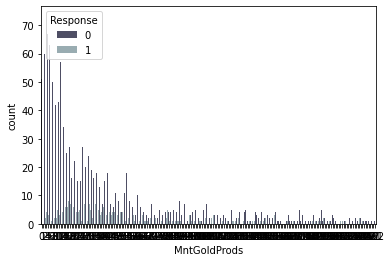

In [26]:
sns.countplot(x=df['MntGoldProds'],hue=df['Response'],palette='bone')

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='count'>

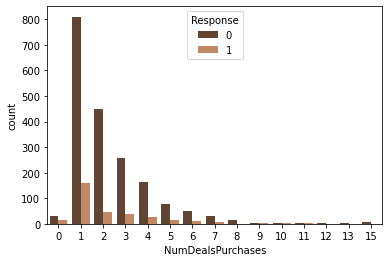

In [27]:
sns.countplot(x=df['NumDealsPurchases'],hue=df['Response'],palette='copper')

<AxesSubplot:xlabel='NumWebPurchases', ylabel='count'>

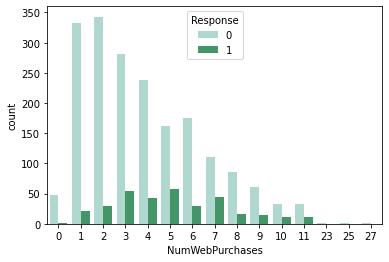

In [28]:
sns.countplot(x=df['NumWebPurchases'],hue=df['Response'],palette='BuGn')

<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='count'>

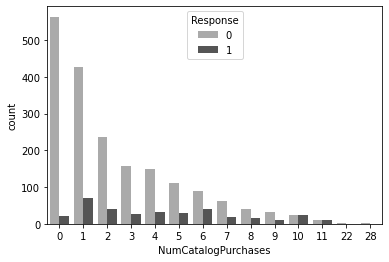

In [29]:
sns.countplot(x=df['NumCatalogPurchases'],hue=df['Response'],palette='binary')

<AxesSubplot:xlabel='NumStorePurchases', ylabel='count'>

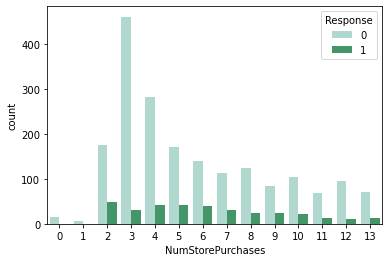

In [30]:
sns.countplot(x=df['NumStorePurchases'],hue=df['Response'],palette='BuGn')

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='count'>

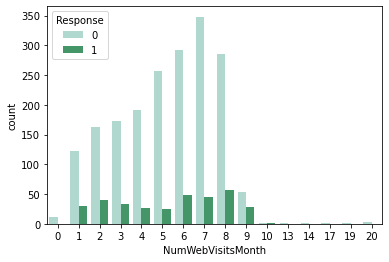

In [31]:
sns.countplot(x=df['NumWebVisitsMonth'],hue=df['Response'],palette='BuGn')

<AxesSubplot:xlabel='AcceptedCmp3', ylabel='count'>

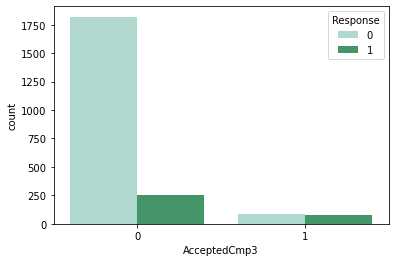

In [32]:
sns.countplot(x=df['AcceptedCmp3'],hue=df['Response'],palette='BuGn')

<AxesSubplot:xlabel='AcceptedCmp5', ylabel='count'>

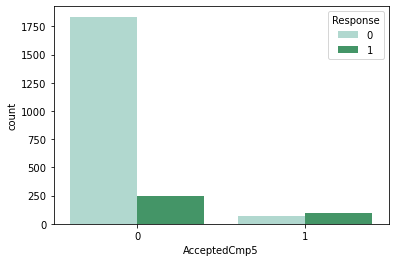

In [33]:
sns.countplot(x=df['AcceptedCmp5'],hue=df['Response'],palette='BuGn')

<AxesSubplot:xlabel='AcceptedCmp1', ylabel='count'>

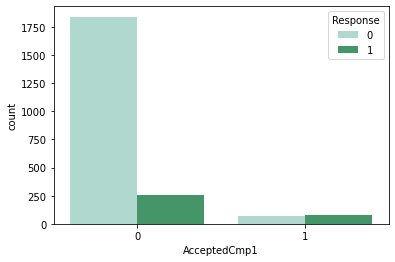

In [34]:
sns.countplot(x=df['AcceptedCmp1'],hue=df['Response'],palette='BuGn')

<AxesSubplot:xlabel='AcceptedCmp2', ylabel='count'>

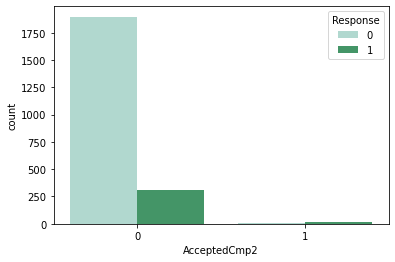

In [16]:
sns.countplot(x=df['AcceptedCmp2'],hue=df['Response'],palette='BuGn')

<AxesSubplot:xlabel='Complain', ylabel='count'>

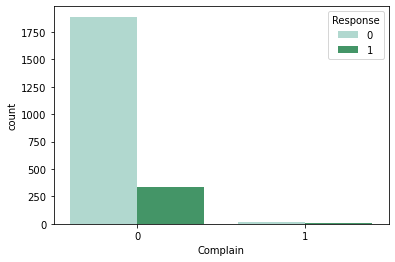

In [17]:
sns.countplot(x=df['Complain'],hue=df['Response'],palette='BuGn')

<AxesSubplot:xlabel='Z_CostContact', ylabel='count'>

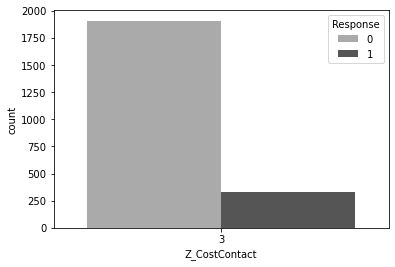

In [18]:
sns.countplot(x=df['Z_CostContact'],hue=df['Response'],palette='binary')

<AxesSubplot:xlabel='Z_Revenue', ylabel='count'>

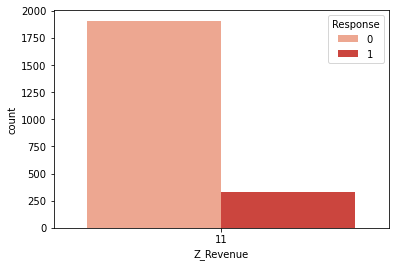

In [19]:
sns.countplot(x=df['Z_Revenue'],hue=df['Response'],palette='Reds')

# EDA

In [36]:
#df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
#df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']).dt.strftime('%Y-%m-%d %H:%M:%S')
#d

In [37]:
# drop column
df.drop('Dt_Customer', axis=1, inplace=True)

In [38]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0            0       58       635         88  ...                  7   
1            1       38        11          1  ...                  5   
2            0       26       426         49  ...                  4   
3            0       26        11          4  ...                  6   
4            0       94       173         43  ...                  5   
...        ...      ...       ...        ...  ...                ...   
2235         1       46       709         43  ...                  5   
2236         1       56       406          0  ...                  7   
2237         0       91       908         48  ...                  6   
2238         1        8       428         30  ...                  3   
2239         1       40        84          3  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 28 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

# Missing value 

In [40]:
# checking null value if present
[i for i in df.columns if df[i].isna().sum()>0]

['Income']

In [41]:
# function that returns number of missings, percentage of missings and if it is above or below 3% threshold

def missing_values_reporter(df):    
    na_count = df.isna().sum() 
    ser = na_count[na_count > 0]
    ser_p = np.round(ser.divide(df.shape[0])*100,2)
    tmp = pd.DataFrame({"N missings": ser,"% missings": ser_p,"Above Threshold (3%)": False})
    tmp.loc[tmp["% missings"] > 3., 'Above Threshold (3%)'] = 'True' 
    return tmp

In [42]:
df_miss=missing_values_reporter(df)
df_miss

N missings  % missings Above Threshold (3%)
Income          24        1.07                False

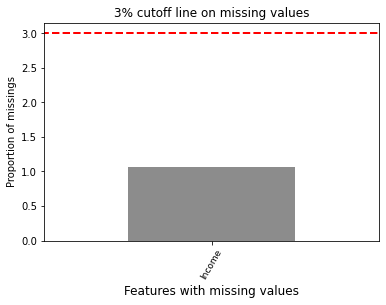

In [43]:
# cutoff is in percentage

cutoff_ = 3

cutoff_list = [cutoff_, cutoff_]
ax = df_miss.sort_values('% missings', ascending=False).plot.bar(y="% missings", 
                                                                 color="Grey",
                                                                 alpha = 0.9,
                                                                 title="{}% cutoff line on missing values".format(cutoff_),
                                                                 legend=False)
ax.set_xlabel("Features with missing values", size=12)
ax.set_ylabel("Proportion of missings")
ax.plot([-1, len(df_miss.index)], cutoff_list,'r--', lw=2)
ax.set_xticklabels(df_miss.index, rotation=60, size=9)
plt.show()

In [44]:
df['Income'].mean()

52247.25135379061

In [45]:
# immputing missing value by mean

df['Income'].fillna(df['Income'].mean(),inplace=True)

In [46]:
[i for i in df.columns if df[i].isna().sum()>0]

[]

# Outlier Detection

<AxesSubplot:>

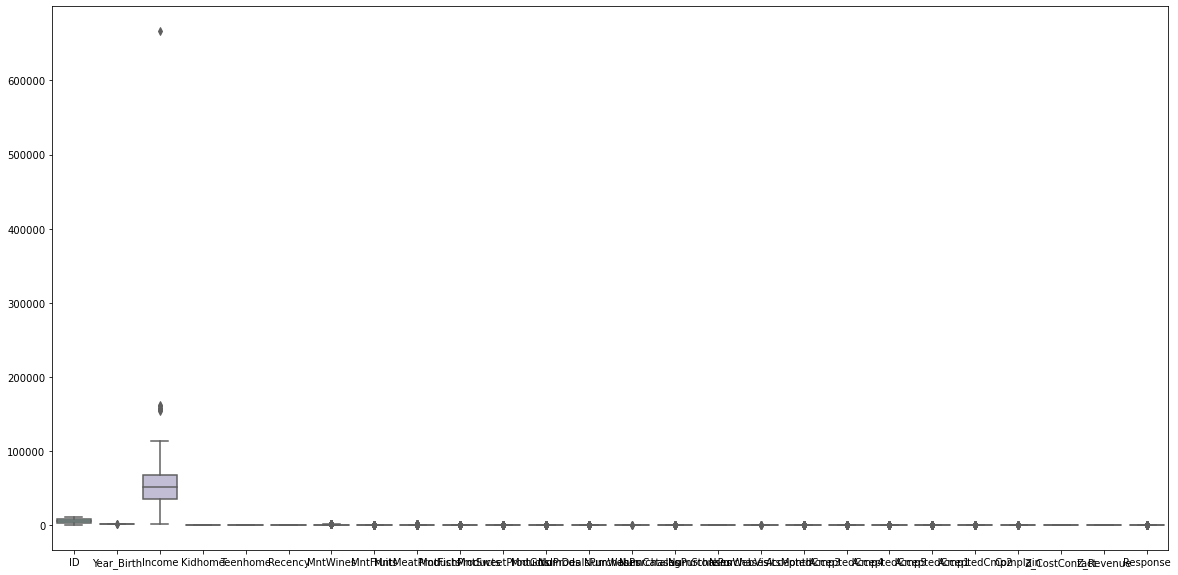

In [48]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,color='bone',palette="Set3")

<AxesSubplot:xlabel='Income'>

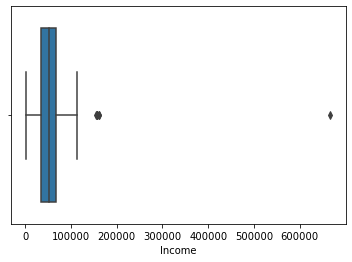

In [49]:
sns.boxplot(df['Income'])

In [50]:
# most of these outlier present in Income

In [51]:
q1=df['Income'].describe()[4]     #25%    #df['fn'].quintile(0.25)
q3=df['Income'].describe()[6]      #75%
iqr=q3-q1

lower_tail=q1-1.5*iqr     # upper tail q3+1.5(iqr)      
print()
print('q1==',q1)
print('q3==',q3)
print()
print('iqr==',iqr)
print()
print('lower_tail==',lower_tail)


q1== 35538.75
q3== 68289.75

iqr== 32751.0

lower_tail== -13587.75


In [52]:
df.loc[df['Income']<lower_tail,'Income']=np.nan # imputing outlier with nan

In [53]:
np.where(df['Income']<lower_tail)  # so succesfully imputed with outlier 

(array([], dtype=int64),)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

# One Hot Encoding

In [56]:
df=pd.get_dummies(df,columns=['Marital_Status','Education'],drop_first= True)

In [57]:
df

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0      5524        1957  58138.0        0         0       58       635   
1      2174        1954  46344.0        1         1       38        11   
2      4141        1965  71613.0        0         0       26       426   
3      6182        1984  26646.0        1         0       26        11   
4      5324        1981  58293.0        1         0       94       173   
...     ...         ...      ...      ...       ...      ...       ...   
2235  10870        1967  61223.0        0         1       46       709   
2236   4001        1946  64014.0        2         1       56       406   
2237   7270        1981  56981.0        0         0       91       908   
2238   8235        1956  69245.0        0         1        8       428   
2239   9405        1954  52869.0        1         1       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  ...  \
0            88              546              172  ...   
1             1                6                2  ...   
2            49              127              111  ...   
3             4               20               10  ...   
4            43              118               46  ...   
...         ...              ...              ...  ...   
2235         43              182               42  ...   
2236          0               30                0  ...   
2237         48              217               32  ...   
2238         30              214               80  ...   
2239          3               61                2  ...   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                           0                       0                      1   
1                           0                       0                      1   
2                           0                       0                      0   
3                           0                       0                      0   
4                           0                       1                      0   
...                       ...                     ...                    ...   
2235                        0                       1                      0   
2236                        0                       0                      0   
2237                        1                       0                      0   
2238                        0                       0                      0   
2239                        0                       1                      0   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                           0                     0                    0   
1                           0                     0                    0   
2                           1                     0                    0   
3                           1                     0                    0   
4                           0                     0                    0   
...                       ...                   ...                  ...   
2235                        0                     0                    0   
2236                        1                     0                    0   
2237                        0                     0                    0   
2238                        1                     0                    0   
2239                        0                     0                    0   

      Education_Basic  Education_Graduation  Education_Master  Education_PhD  
0                   0                     1                 0              0  
1                   0                     1                 0              0  
2                   0                     1                 0              0  
3                   0                     1                 0              0  
4                   0                     0                 0              1  
...               ...                   ...               ...            ..

In [58]:
df1=df.copy()

# Standardization

In [60]:
#Standardization
x=df.drop('Response',axis=1)
y=df['Response']

std=StandardScaler()
arr=std.fit_transform(x)
std_df=pd.DataFrame(arr,columns=x.columns)
std_df

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0    -0.020999   -0.985345  0.235327 -0.825218 -0.929894  0.307039  0.983781   
1    -1.053058   -1.235733 -0.235826  1.032559  0.906934 -0.383664 -0.870479   
2    -0.447070   -0.317643  0.773633 -0.825218 -0.929894 -0.798086  0.362723   
3     0.181716    1.268149 -1.022732  1.032559 -0.929894 -0.798086 -0.870479   
4    -0.082614    1.017761  0.241519  1.032559 -0.929894  1.550305 -0.389085   
...        ...         ...       ...       ...       ...       ...       ...   
2235  1.625983   -0.150717  0.358568 -0.825218  0.906934 -0.107383  1.203678   
2236 -0.490200   -1.903435  0.470064  2.890335  0.906934  0.237969  0.303291   
2237  0.516905    1.017761  0.189106 -0.825218 -0.929894  1.446700  1.795020   
2238  0.814199   -1.068807  0.679035 -0.825218  0.906934 -1.419719  0.368666   
2239  1.174650   -1.235733  0.024838  1.032559  0.906934 -0.314594 -0.653555   

      MntFruits  MntMeatProducts  MntFishProducts  ...  \
0      1.551577         1.679702         2.462147  ...   
1     -0.636301        -0.713225        -0.650449  ...   
2      0.570804        -0.177032         1.345274  ...   
3     -0.560857        -0.651187        -0.503974  ...   
4      0.419916        -0.216914         0.155164  ...   
...         ...              ...              ...  ...   
2235   0.419916         0.066692         0.081926  ...   
2236  -0.661449        -0.606873        -0.687068  ...   
2237   0.545656         0.221789        -0.101168  ...   
2238   0.092992         0.208495         0.777683  ...   
2239  -0.586005        -0.469501        -0.650449  ...   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                   -0.339909               -0.792406               1.914854   
1                   -0.339909               -0.792406               1.914854   
2                   -0.339909               -0.792406              -0.522233   
3                   -0.339909               -0.792406              -0.522233   
4                   -0.339909                1.261980              -0.522233   
...                       ...                     ...                    ...   
2235                -0.339909                1.261980              -0.522233   
2236                -0.339909               -0.792406              -0.522233   
2237                 2.941967               -0.792406              -0.522233   
2238                -0.339909               -0.792406              -0.522233   
2239                -0.339909                1.261980              -0.522233   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                   -0.591099             -0.188676            -0.029894   
1                   -0.591099             -0.188676            -0.029894   
2                    1.691765             -0.188676            -0.029894   
3                    1.691765             -0.188676            -0.029894   
4                   -0.591099             -0.188676            -0.029894   
...                       ...                   ...                  ...   
2235                -0.591099             -0.188676            -0.029894   
2236                 1.691765             -0.188676            -0.029894   
2237                -0.591099             -0.188676            -0.029894   
2238                 1.691765             -0.188676            -0.029894   
2239                -0.591099             -0.188676            -0.029894   

      Education_Basic  Education_Graduation  Education_Master  Education_PhD  
0           -0.157171              0.993769         -0.444816      -0.526385  
1           -0.157171              0.993769         -0.444816      -0.526385  
2           -0.157171              0.993769         -0.444816      -0.526385  
3           -0.157171              0.993769         -0.444816      -0.526385  
4           -0.157171             -1.006270         -0.444816       1.899751  
...   

# Normalization

In [ ]:
norm=MinMaxScaler()
arr=norm.fit_transform(x)
norm_df=pd.DataFrame(arr,columns=x.columns)
norm_df

# Transformation

In [64]:
log_tf_df=np.log(df)
log_tf_df

ID  Year_Birth     Income   Kidhome  Teenhome   Recency  MntWines  \
0     8.616858    7.579168  10.970575      -inf      -inf  4.060443  6.453625   
1     7.684324    7.577634  10.743847  0.000000       0.0  3.637586  2.397895   
2     8.328693    7.583248  11.179032      -inf      -inf  3.258097  6.054439   
3     8.729397    7.592870  10.190394  0.000000      -inf  3.258097  2.397895   
4     8.579980    7.591357  10.973237  0.000000      -inf  4.543295  5.153292   
...        ...         ...        ...       ...       ...       ...       ...   
2235  9.293762    7.584265  11.022278      -inf       0.0  3.828641  6.563856   
2236  8.294300    7.573531  11.066857  0.693147       0.0  4.025352  6.006353   
2237  8.891512    7.591357  10.950473      -inf      -inf  4.510860  6.811244   
2238  9.016149    7.578657  11.145406      -inf       0.0  2.079442  6.059123   
2239  9.148997    7.577634  10.875572  0.000000       0.0  3.688879  4.430817   

      MntFruits  MntMeatProducts  MntFishProducts  ...  \
0      4.477337         6.302619         5.147494  ...   
1      0.000000         1.791759         0.693147  ...   
2      3.891820         4.844187         4.709530  ...   
3      1.386294         2.995732         2.302585  ...   
4      3.761200         4.770685         3.828641  ...   
...         ...              ...              ...  ...   
2235   3.761200         5.204007         3.737670  ...   
2236       -inf         3.401197             -inf  ...   
2237   3.871201         5.379897         3.465736  ...   
2238   3.401197         5.365976         4.382027  ...   
2239   1.098612         4.110874         0.693147  ...   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        -inf                    -inf                    0.0   
1                        -inf                    -inf                    0.0   
2                        -inf                    -inf                   -inf   
3                        -inf                    -inf                   -inf   
4                        -inf                     0.0                   -inf   
...                       ...                     ...                    ...   
2235                     -inf                     0.0                   -inf   
2236                     -inf                    -inf                   -inf   
2237                      0.0                    -inf                   -inf   
2238                     -inf                    -inf                   -inf   
2239                     -inf                     0.0                   -inf   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        -inf                  -inf                 -inf   
1                        -inf                  -inf                 -inf   
2                         0.0                  -inf                 -inf   
3                         0.0                  -inf                 -inf   
4                        -inf                  -inf                 -inf   
...                       ...                   ...                  ...   
2235                     -inf                  -inf                 -inf   
2236                      0.0                  -inf                 -inf   
2237                     -inf                  -inf                 -inf   
2238                      0.0                  -inf                 -inf   
2239                     -inf                  -inf                 -inf   

      Education_Basic  Education_Graduation  Education_Master  Education_PhD  
0                -inf                   0.0              -inf           -inf  
1                -inf                   0.0              -inf           -inf  
2                -inf                   0.0              -inf           -inf  
3                -inf                   0.0              -inf           -inf  
4                -inf                  -inf              -inf            

In [65]:
sqrt_tf_df=np.sqrt(df)
sqrt_tf_df

ID  Year_Birth      Income   Kidhome  Teenhome   Recency  \
0      74.323617   44.237993  241.118228  0.000000       0.0  7.615773   
1      46.626173   44.204072  215.276566  1.000000       1.0  6.164414   
2      64.350602   44.328321  267.606054  0.000000       0.0  5.099020   
3      78.625696   44.542115  163.236025  1.000000       0.0  5.099020   
4      72.965745   44.508426  241.439433  1.000000       0.0  9.695360   
...          ...         ...         ...       ...       ...       ...   
2235  104.259292   44.350874  247.432819  0.000000       1.0  6.782330   
2236   63.253458   44.113490  253.009881  1.414214       1.0  7.483315   
2237   85.264295   44.508426  238.706933  0.000000       0.0  9.539392   
2238   90.746901   44.226689  263.144447  0.000000       1.0  2.828427   
2239   96.979379   44.204072  229.932599  1.000000       1.0  6.324555   

       MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0     25.199206   9.380832        23.366643        13.114877  ...   
1      3.316625   1.000000         2.449490         1.414214  ...   
2     20.639767   7.000000        11.269428        10.535654  ...   
3      3.316625   2.000000         4.472136         3.162278  ...   
4     13.152946   6.557439        10.862780         6.782330  ...   
...         ...        ...              ...              ...  ...   
2235  26.627054   6.557439        13.490738         6.480741  ...   
2236  20.149442   0.000000         5.477226         0.000000  ...   
2237  30.133038   6.928203        14.730920         5.656854  ...   
2238  20.688161   5.477226        14.628739         8.944272  ...   
2239   9.165151   1.732051         7.810250         1.414214  ...   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                         0.0                     0.0                    1.0   
1                         0.0                     0.0                    1.0   
2                         0.0                     0.0                    0.0   
3                         0.0                     0.0                    0.0   
4                         0.0                     1.0                    0.0   
...                       ...                     ...                    ...   
2235                      0.0                     1.0                    0.0   
2236                      0.0                     0.0                    0.0   
2237                      1.0                     0.0                    0.0   
2238                      0.0                     0.0                    0.0   
2239                      0.0                     1.0                    0.0   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                         0.0                   0.0                  0.0   
1                         0.0                   0.0                  0.0   
2                         1.0                   0.0                  0.0   
3                         1.0                   0.0                  0.0   
4                         0.0                   0.0                  0.0   
...                       ...                   ...                  ...   
2235                      0.0                   0.0                  0.0   
2236                      1.0                   0.0                  0.0   
2237                      0.0                   0.0                  0.0   
2238                      1.0                   0.0                  0.0   
2239                      0.0                   0.0                  0.0   

      Education_Basic  Education_Graduation  Education_Master  Education_PhD  
0                 0.0                   1.0               0.0            0.0  
1                 0.0                   1.0               0.0            0.0  
2                 0.0                   1.0               0.0            0.0  
3                 0.0                   1.0               0.0            0.0  
4                 0.0      

In [66]:
cbrt_tf_df=np.cbrt(df)
cbrt_tf_df

ID  Year_Birth     Income   Kidhome  Teenhome   Recency  \
0     17.677380   12.508261  38.739442  0.000000       0.0  3.870877   
1     12.954476   12.501866  35.919574  1.000000       1.0  3.361975   
2     16.058380   12.525282  41.527006  0.000000       0.0  2.962496   
3     18.353110   12.565523  29.868312  1.000000       0.0  2.962496   
4     17.461412   12.559186  38.773839  1.000000       0.0  4.546836   
...         ...         ...        ...       ...       ...       ...   
2235  22.151842   12.529530  39.412883  0.000000       1.0  3.583048   
2236  15.875333   12.484781  40.002916  1.259921       1.0  3.825862   
2237  19.372164   12.559186  38.480735  0.000000       0.0  4.497941   
2238  20.193946   12.506130  41.064147  0.000000       1.0  2.000000   
2239  21.108284   12.501866  37.531884  1.000000       1.0  3.419952   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0     8.595238   4.447960         8.173302         5.561298  ...   
1     2.223980   1.000000         1.817121         1.259921  ...   
2     7.524365   3.659306         5.026526         4.805896  ...   
3     2.223980   1.587401         2.714418         2.154435  ...   
4     5.572055   3.503398         4.904868         3.583048  ...   
...        ...        ...              ...              ...  ...   
2235  8.916931   3.503398         5.667051         3.476027  ...   
2236  7.404721   0.000000         3.107233         0.000000  ...   
2237  9.683417   3.634241         6.009245         3.174802  ...   
2238  7.536122   3.107233         5.981424         4.308869  ...   
2239  4.379519   1.442250         3.936497         1.259921  ...   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                         0.0                     0.0                    1.0   
1                         0.0                     0.0                    1.0   
2                         0.0                     0.0                    0.0   
3                         0.0                     0.0                    0.0   
4                         0.0                     1.0                    0.0   
...                       ...                     ...                    ...   
2235                      0.0                     1.0                    0.0   
2236                      0.0                     0.0                    0.0   
2237                      1.0                     0.0                    0.0   
2238                      0.0                     0.0                    0.0   
2239                      0.0                     1.0                    0.0   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                         0.0                   0.0                  0.0   
1                         0.0                   0.0                  0.0   
2                         1.0                   0.0                  0.0   
3                         1.0                   0.0                  0.0   
4                         0.0                   0.0                  0.0   
...                       ...                   ...                  ...   
2235                      0.0                   0.0                  0.0   
2236                      1.0                   0.0                  0.0   
2237                      0.0                   0.0                  0.0   
2238                      1.0                   0.0                  0.0   
2239                      0.0                   0.0                  0.0   

      Education_Basic  Education_Graduation  Education_Master  Education_PhD  
0                 0.0                   1.0               0.0            0.0  
1                 0.0                   1.0               0.0            0.0  
2                 0.0                   1.0               0.0            0.0  
3                 0.0                   1.0               0.0            0.0  
4                 0.0                   0.0               0.0 

# Feature Selection

In [68]:
df.corr()

ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                       1.000000    0.000028  0.013036  0.002406 -0.002580   
Year_Birth               0.000028    1.000000 -0.160942  0.230176 -0.352111   
Income                   0.013036   -0.160942  1.000000 -0.425176  0.019018   
Kidhome                  0.002406    0.230176 -0.425176  1.000000 -0.036133   
Teenhome                -0.002580   -0.352111  0.019018 -0.036133  1.000000   
Recency                 -0.046524   -0.019871 -0.003946  0.008827  0.016198   
MntWines                -0.022878   -0.157773  0.576789 -0.496297  0.004846   
MntFruits                0.004600   -0.017917  0.428747 -0.372581 -0.176764   
MntMeatProducts         -0.004437   -0.030872  0.577802 -0.437129 -0.261160   
MntFishProducts         -0.024475   -0.041625  0.437497 -0.387644 -0.204187   
MntSweetProducts        -0.007642   -0.018133  0.436162 -0.370673 -0.162475   
MntGoldProds            -0.013438   -0.061818  0.321978 -0.349595 -0.021725   
NumDealsPurchases       -0.037166   -0.060846 -0.082290  0.221798  0.387741   
NumWebPurchases         -0.018924   -0.145040  0.380550 -0.361647  0.155500   
NumCatalogPurchases     -0.003440   -0.121275  0.586725 -0.502237 -0.110769   
NumStorePurchases       -0.014927   -0.128272  0.526489 -0.499683  0.050695   
NumWebVisitsMonth       -0.007446    0.121139 -0.549824  0.447846  0.134884   
AcceptedCmp3            -0.036040    0.061774 -0.016168  0.014674 -0.042677   
AcceptedCmp4            -0.025387   -0.060510  0.182791 -0.161600  0.038886   
AcceptedCmp5            -0.007517    0.007123  0.334850 -0.205634 -0.191050   
AcceptedCmp1            -0.021614   -0.005930  0.274921 -0.172339 -0.140090   
AcceptedCmp2            -0.015061   -0.006539  0.087538 -0.081716 -0.015605   
Complain                 0.033883   -0.030128 -0.027223  0.040207  0.003138   
Z_CostContact                 NaN         NaN       NaN       NaN       NaN   
Z_Revenue                     NaN         NaN       NaN       NaN       NaN   
Response                -0.021968    0.021325  0.132756 -0.080008 -0.154446   
Marital_Status_Alone    -0.032310    0.012819 -0.012374  0.037813  0.010791   
Marital_Status_Divorced -0.017289   -0.071774  0.007970 -0.019199  0.052613   
Marital_Status_Married   0.010007    0.051193 -0.016399  0.017403  0.007749   
Marital_Status_Single   -0.016558    0.116978 -0.025628  0.019779 -0.095925   
Marital_Status_Together  0.009563   -0.052258  0.023288  0.006373  0.025038   
Marital_Status_Widow     0.021937   -0.161370  0.031501 -0.073760  0.045093   
Marital_Status_YOLO      0.002029    0.010465 -0.004556 -0.024669  0.027112   
Education_Basic         -0.009478    0.113564 -0.200549  0.054144 -0.119421   
Education_Graduation     0.018713    0.069667  0.018833  0.000648 -0.022213   
Education_Master        -0.025833   -0.071557  0.011750  0.008146  0.023601   
Education_PhD            0.004368   -0.121370  0.081126 -0.042013  0.089451   

                          Recency  MntWines  MntFruits  MntMeatProducts  \
ID                      -0.046524 -0.022878   0.004600        -0.004437   
Year_Birth              -0.019871 -0.157773  -0.017917        -0.030872   
Income                  -0.003946  0.576789   0.428747         0.577802   
Kidhome                  0.008827 -0.496297  -0.372581        -0.437129   
Teenhome                 0.016198  0.004846  -0.176764        -0.261160   
Recency                  1.000000  0.016064  -0.004306         0.023056   
MntWines                 0.016064  1.000000   0.389637         0.562667   
MntFruits               -0.004306  0.389637   1.000000         0.543105   
MntMeatProducts          0.023056  0.562667   0.543105         1.000000   
MntFishProducts          0.001079  0.399753   0.594804         0.568402   
MntSweetProducts         0.022670  0.386581   0.567164         0.523846   
MntGoldProds             0.016693  0.387516   0.392995         0.350609   
NumDealsPurchases       -0.001098  0.010940  -0.13211

<AxesSubplot:>

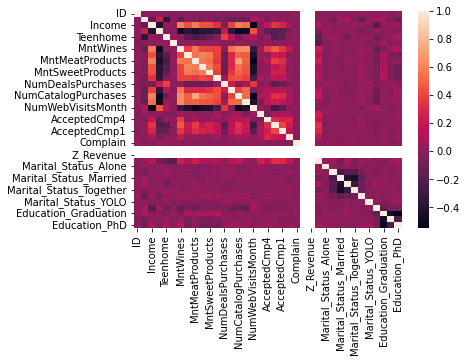

In [69]:
sns.heatmap(df.corr())

# Spearman Method

<AxesSubplot:>

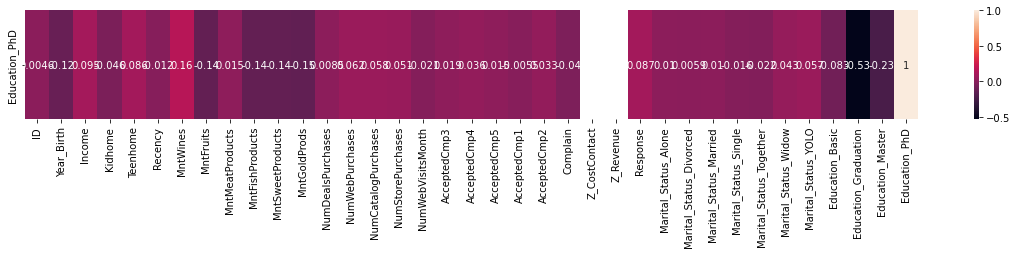

In [70]:
corr=df.corr(method='spearman').tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

# Kendall

<AxesSubplot:>

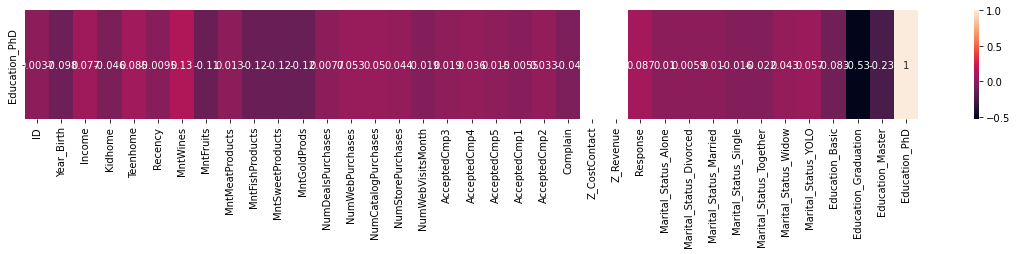

In [71]:
corr=df.corr(method='kendall').tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

# Pearson Method

<AxesSubplot:>

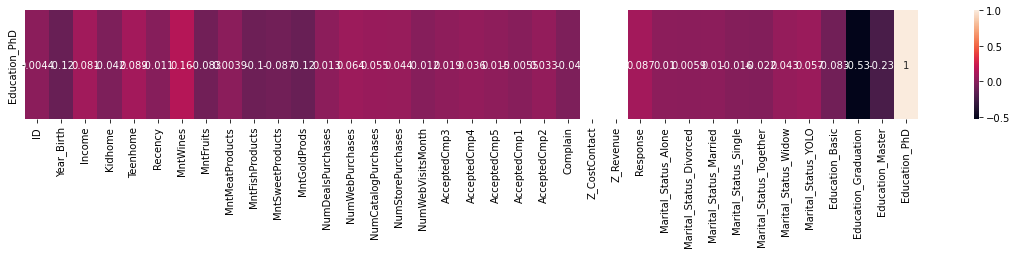

In [72]:
corr=df.corr(method='pearson').tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

# missing value ratio

In [194]:
df.isna().mean()*100

ID                         0.0
Year_Birth                 0.0
Income                     0.0
Kidhome                    0.0
Teenhome                   0.0
Recency                    0.0
MntWines                   0.0
MntFruits                  0.0
MntMeatProducts            0.0
MntFishProducts            0.0
MntSweetProducts           0.0
MntGoldProds               0.0
NumDealsPurchases          0.0
NumWebPurchases            0.0
NumCatalogPurchases        0.0
NumStorePurchases          0.0
NumWebVisitsMonth          0.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Z_CostContact              0.0
Z_Revenue                  0.0
Response                   0.0
Marital_Status_Alone       0.0
Marital_Status_Divorced    0.0
Marital_Status_Married     0.0
Marital_Status_Single      0.0
Marital_Status_Together    0.0
Marital_Status_Widow       0.0
Marital_

# varience threshold method

In [87]:
var_th = VarianceThreshold(threshold=0.5)
var_th.fit_transform(x)
var_th.get_support()

NameError: name 'VarianceThreshold' is not defined

In [ ]:
np.where(var_th.get_support()==False)

# Anova Test

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
f_val,p_val=f_classif(df)
df=pd.DataFrame({'f_val':f_val,'p_Val':np.around(p_val,5)},index=x.columns)
df.sort_values('f_val')

# Forward Feature Selection Method

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()

sfs=SequentialFeatureSelector(knn_model,n_features_to_select=6,direction='forward',cv=5,n_jobs=-1)
sfs.fit(df)
arr2=sfs.get_support()
s3=pd.Series(arr2,index=x1.columns)
s3

# Bidirectional

In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector  

from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()

sfs=SequentialFeatureSelector(knn_model,k_features=5,floating=True,cv=5,n_jobs=-1)
sfs.fit(x,y)
pd.DataFrame(sfs.subsets_).T

# Model Building

In [90]:
# train test split

x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Response']),df['Response'],test_size=0.20,random_state=42)

In [91]:
x_train

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
792    3479        1950  16813.0        0         0       49         4   
1271   7488        1963  64191.0        0         1       30       420   
1538   1079        1971  71969.0        0         1       59      1000   
668   11007        1968  29187.0        1         0       43        26   
1975  10311        1969   4428.0        0         1        0        16   
...     ...         ...      ...      ...       ...      ...       ...   
1638  10785        1969  44078.0        1         1       17        24   
1095   9964        1979  61825.0        0         1       56       162   
1130   3412        1951  67381.0        0         1       67       815   
1294   2811        1963  48918.0        1         1       21        52   
860    4297        1969  23228.0        1         0       71        13   

      MntFruits  MntMeatProducts  MntFishProducts  ...  \
792           8               11               12  ...   
1271         15              186              151  ...   
1538          0               76                0  ...   
668           0                6                0  ...   
1975          4               12                2  ...   
...         ...              ...              ...  ...   
1638          1               10                2  ...   
1095         50              100               55  ...   
1130          8               53               11  ...   
1294          0                9                0  ...   
860           2               18                6  ...   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
792                         0                       0                      1   
1271                        0                       0                      1   
1538                        0                       1                      0   
668                         0                       1                      0   
1975                        0                       1                      0   
...                       ...                     ...                    ...   
1638                        0                       1                      0   
1095                        0                       0                      1   
1130                        0                       1                      0   
1294                        0                       0                      1   
860                         0                       0                      0   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
792                         0                     0                    0   
1271                        0                     0                    0   
1538                        0                     0                    0   
668                         0                     0                    0   
1975                        0                     0                    0   
...                       ...                   ...                  ...   
1638                        0                     0                    0   
1095                        0                     0                    0   
1130                        0                     0                    0   
1294                        0                     0                    0   
860                         1                     0                    0   

      Education_Basic  Education_Graduation  Education_Master  Education_PhD  
792                 0                     1                 0              0  
1271                0                     0                 1              0  
1538                0                     0                 0              1  
668                 0                     0                 0              1  
1975                0                     1                 0              0  
...               ...                   ...               ...            ..

In [92]:
x_test

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
324   2607        1953  40464.0        0         1       78       424   
96    7247        1960  47916.0        0         1       72       505   
2104  5802        1972  14188.0        0         0       40         2   
1259  2147        1969  76653.0        0         0       91       736   
1061  3759        1958  65196.0        0         2       34       743   
...    ...         ...      ...      ...       ...      ...       ...   
423   1361        1974  82584.0        0         0       26      1076   
1340  9386        1962  50127.0        0         1       88       274   
755   3870        1978  63855.0        0         0       28       359   
2138  2948        1954  62637.0        0         1       76       104   
618   8650        1978  54162.0        1         1       31         5   

      MntFruits  MntMeatProducts  MntFishProducts  ...  \
324          17              118                7  ...   
96            0               26                0  ...   
2104          7               11               16  ...   
1259         63              946              219  ...   
1061         19              181               12  ...   
...         ...              ...              ...  ...   
423          68              103               29  ...   
1340          0               21                4  ...   
755          35              314               93  ...   
2138         12               48                4  ...   
618           6               10                6  ...   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
324                         0                       0                      1   
96                          0                       0                      0   
2104                        0                       1                      0   
1259                        0                       0                      0   
1061                        0                       0                      0   
...                       ...                     ...                    ...   
423                         0                       1                      0   
1340                        0                       0                      0   
755                         0                       0                      0   
2138                        1                       0                      0   
618                         0                       0                      0   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
324                         0                     0                    0   
96                          0                     1                    0   
2104                        0                     0                    0   
1259                        1                     0                    0   
1061                        1                     0                    0   
...                       ...                   ...                  ...   
423                         0                     0                    0   
1340                        1                     0                    0   
755                         1                     0                    0   
2138                        0                     0                    0   
618                         0                     1                    0   

      Education_Basic  Education_Graduation  Education_Master  Education_PhD  
324                 0                     1                 0              0  
96                  0                     1                 0              0  
2104                1                     0                 0              0  
1259                0                     1                 0              0  
1061                0                     1                 0              0  
...               ...                   ...               ...            ...  
423    

In [93]:
y_train

792     0
1271    0
1538    0
668     0
1975    0
       ..
1638    0
1095    0
1130    0
1294    0
860     0
Name: Response, Length: 1792, dtype: int64

In [94]:
y_test

324     0
96      0
2104    0
1259    0
1061    0
       ..
423     1
1340    0
755     0
2138    0
618     0
Name: Response, Length: 448, dtype: int64

# Logistic Regression

In [96]:
log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [97]:
# slope (m)
log_reg.intercept_

array([-1.01490497e-06])

In [98]:
# coeficient (c)
log_reg.coef_

array([[-2.65177877e-05, -4.74527010e-04, -1.61643264e-05,
         9.20024213e-05, -2.71356653e-04, -2.47983642e-02,
         1.72194284e-03, -6.67872948e-04,  2.51344057e-03,
        -3.60705923e-03,  8.17149470e-04,  4.53720194e-03,
         1.21507024e-04,  6.45181195e-04,  4.85873424e-04,
        -1.48363320e-03,  1.08121388e-03,  3.23470848e-04,
         1.43563205e-04,  2.68400631e-04,  2.57936251e-04,
         6.02323648e-05,  6.81903874e-06, -3.04470145e-06,
        -1.11639053e-05,  5.44935105e-06,  8.03703890e-05,
        -1.66322801e-04,  1.86385305e-04, -1.77770759e-04,
         5.82358137e-05,  5.76023080e-06, -1.72342644e-05,
        -7.97885190e-05, -1.25711626e-05,  1.42636740e-04]])

<AxesSubplot:>

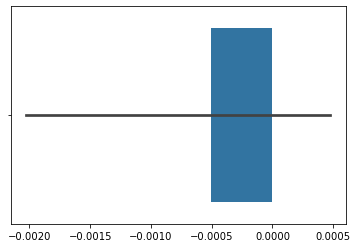

In [99]:
series=pd.Series(log_reg.coef_[0])
sns.barplot(series)

In [100]:
# performance matrix on training data

y_pred_train=log_reg.predict(x_train)

prec=precision_score(y_train,y_pred_train)
print('precision score is',prec)
print("*"*60)
acc_score_train=accuracy_score(y_train,y_pred_train)
print('accuracy score is',acc_score_train)
print("*"*60)
conf=confusion_matrix(y_train,y_pred_train)
print('confusion matrix',conf)
print("*"*60)
cls_report=classification_report(y_train,y_pred_train)
print('classification report',cls_report)

precision score is 0.5454545454545454
************************************************************
accuracy score is 0.8560267857142857
************************************************************
confusion matrix [[1492   35]
 [ 223   42]]
************************************************************
classification report               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1527
           1       0.55      0.16      0.25       265

    accuracy                           0.86      1792
   macro avg       0.71      0.57      0.58      1792
weighted avg       0.82      0.86      0.82      1792



In [101]:
# testing
y_pred_test=log_reg.predict(x_test)

prec=precision_score(y_test,y_pred_test)
print('precision score is',prec)
print("*"*60)
acc_score_test=accuracy_score(y_test,y_pred_test)
print('accuracy score is',acc_score_test)
print("*"*60)
conf=confusion_matrix(y_test,y_pred_test)
print('confusion matrix',conf)
print("*"*60)
cls_report=classification_report(y_test,y_pred_test)
print('classification report',cls_report)

precision score is 0.47058823529411764
************************************************************
accuracy score is 0.84375
************************************************************
confusion matrix [[370   9]
 [ 61   8]]
************************************************************
classification report               precision    recall  f1-score   support

           0       0.86      0.98      0.91       379
           1       0.47      0.12      0.19        69

    accuracy                           0.84       448
   macro avg       0.66      0.55      0.55       448
weighted avg       0.80      0.84      0.80       448



In [102]:
# creating for record of all accuracy
result_dict = {'accuracy_train':[],'accuracy_test': []}
index = []

Text(0, 0.5, 'TPR')

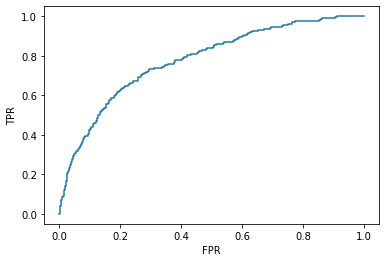

In [103]:
y_pred_proba = log_reg.predict_proba(x_train)
fpr,tpr,thresh = roc_curve(y_train,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [104]:
area = auc(fpr,tpr)
print('Area Under ROC Curve',area)

Area Under ROC Curve 0.778324745771089


In [105]:
# higher auc curve indicate good model

In [106]:
result_dict['accuracy_train'].append(acc_score_train)
result_dict['accuracy_test'].append(acc_score_test)
index.append('logistic_reg')

In [107]:
# try with log reg with over sampling

In [108]:
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [109]:
# oversampling with smote

x=df.drop('Response',axis=1)
y=df['Response']

smt=RandomOverSampler()

x_new,y_new=smt.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2,random_state=12)

In [110]:
## log reg with smote model

In [111]:
log_model_over = LogisticRegression()
log_model_over.fit(x_train,y_train)

LogisticRegression()

In [112]:
## testing data evalution

In [113]:
y_pred=log_model_over.predict(x_test)

con_mat=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n',con_mat)
print('#'*60)
acc_test=accuracy_score(y_test,y_pred)
print('Accuracy: \n', acc_test)
print('#'*60)
clf_report=classification_report(y_test,y_pred)
print('Classification Report: \n',clf_report)

Confusion Matrix: 
 [[293  91]
 [122 257]]
############################################################
Accuracy: 
 0.7208387942332897
############################################################
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.73       384
           1       0.74      0.68      0.71       379

    accuracy                           0.72       763
   macro avg       0.72      0.72      0.72       763
weighted avg       0.72      0.72      0.72       763



In [114]:
# training
y_pred_train=log_model_over.predict(x_train)

con_mat=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n',con_mat)
print('#'*60)
acc_train=accuracy_score(y_train,y_pred_train)
print('Accuracy: \n', acc_train)
print('#'*60)
clf_report=classification_report(y_train,y_pred_train)
print('Classification Report: \n',clf_report)

Confusion Matrix: 
 [[1093  429]
 [ 492 1035]]
############################################################
Accuracy: 
 0.6979337487700885
############################################################
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      1522
           1       0.71      0.68      0.69      1527

    accuracy                           0.70      3049
   macro avg       0.70      0.70      0.70      3049
weighted avg       0.70      0.70      0.70      3049



In [115]:
result_dict['accuracy_test'].append(acc_test)
result_dict['accuracy_train'].append(acc_train)
index.append('logistic_after_oversampling')

# KNN

In [117]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)
normal_scaler=MinMaxScaler()
array=normal_scaler.fit_transform(x)
x_nor_df=pd.DataFrame(array,columns=x.columns)
x_nor_df

ID  Year_Birth    Income  Kidhome  Teenhome   Recency  MntWines  \
0     0.493611    0.621359  0.084832      0.0       0.0  0.585859  0.425318   
1     0.194263    0.592233  0.067095      0.5       0.5  0.383838  0.007368   
2     0.370029    0.699029  0.105097      0.0       0.0  0.262626  0.285332   
3     0.552408    0.883495  0.037471      0.5       0.0  0.262626  0.007368   
4     0.475739    0.854369  0.085065      0.5       0.0  0.949495  0.115874   
...        ...         ...       ...      ...       ...       ...       ...   
2235  0.971316    0.718447  0.089472      0.0       0.5  0.464646  0.474883   
2236  0.357519    0.514563  0.093669      1.0       0.5  0.565657  0.271936   
2237  0.649629    0.854369  0.083092      0.0       0.0  0.919192  0.608171   
2238  0.735859    0.611650  0.101536      0.0       0.5  0.080808  0.286671   
2239  0.840407    0.592233  0.076908      0.5       0.5  0.404040  0.056263   

      MntFruits  MntMeatProducts  MntFishProducts  ...  \
0      0.442211         0.316522         0.664093  ...   
1      0.005025         0.003478         0.007722  ...   
2      0.246231         0.073623         0.428571  ...   
3      0.020101         0.011594         0.038610  ...   
4      0.216080         0.068406         0.177606  ...   
...         ...              ...              ...  ...   
2235   0.216080         0.105507         0.162162  ...   
2236   0.000000         0.017391         0.000000  ...   
2237   0.241206         0.125797         0.123552  ...   
2238   0.150754         0.124058         0.308880  ...   
2239   0.015075         0.035362         0.007722  ...   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                         0.0                     0.0                    1.0   
1                         0.0                     0.0                    1.0   
2                         0.0                     0.0                    0.0   
3                         0.0                     0.0                    0.0   
4                         0.0                     1.0                    0.0   
...                       ...                     ...                    ...   
2235                      0.0                     1.0                    0.0   
2236                      0.0                     0.0                    0.0   
2237                      1.0                     0.0                    0.0   
2238                      0.0                     0.0                    0.0   
2239                      0.0                     1.0                    0.0   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                         0.0                   0.0                  0.0   
1                         0.0                   0.0                  0.0   
2                         1.0                   0.0                  0.0   
3                         1.0                   0.0                  0.0   
4                         0.0                   0.0                  0.0   
...                       ...                   ...                  ...   
2235                      0.0                   0.0                  0.0   
2236                      1.0                   0.0                  0.0   
2237                      0.0                   0.0                  0.0   
2238                      1.0                   0.0                  0.0   
2239                      0.0                   0.0                  0.0   

      Education_Basic  Education_Graduation  Education_Master  Education_PhD  
0                 0.0                   1.0               0.0            0.0  
1                 0.0                   1.0               0.0            0.0  
2                 0.0                   1.0               0.0            0.0  
3                 0.0                   1.0               0.0            0.0  
4                 0.0                   0.0               0.0            1.0  
...               

In [119]:
standard_scaler=StandardScaler()
array=standard_scaler.fit_transform(x)
x_std_df=pd.DataFrame(array,columns=x.columns)
x_std_df

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0    -0.020999   -0.985345  0.235327 -0.825218 -0.929894  0.307039  0.983781   
1    -1.053058   -1.235733 -0.235826  1.032559  0.906934 -0.383664 -0.870479   
2    -0.447070   -0.317643  0.773633 -0.825218 -0.929894 -0.798086  0.362723   
3     0.181716    1.268149 -1.022732  1.032559 -0.929894 -0.798086 -0.870479   
4    -0.082614    1.017761  0.241519  1.032559 -0.929894  1.550305 -0.389085   
...        ...         ...       ...       ...       ...       ...       ...   
2235  1.625983   -0.150717  0.358568 -0.825218  0.906934 -0.107383  1.203678   
2236 -0.490200   -1.903435  0.470064  2.890335  0.906934  0.237969  0.303291   
2237  0.516905    1.017761  0.189106 -0.825218 -0.929894  1.446700  1.795020   
2238  0.814199   -1.068807  0.679035 -0.825218  0.906934 -1.419719  0.368666   
2239  1.174650   -1.235733  0.024838  1.032559  0.906934 -0.314594 -0.653555   

      MntFruits  MntMeatProducts  MntFishProducts  ...  \
0      1.551577         1.679702         2.462147  ...   
1     -0.636301        -0.713225        -0.650449  ...   
2      0.570804        -0.177032         1.345274  ...   
3     -0.560857        -0.651187        -0.503974  ...   
4      0.419916        -0.216914         0.155164  ...   
...         ...              ...              ...  ...   
2235   0.419916         0.066692         0.081926  ...   
2236  -0.661449        -0.606873        -0.687068  ...   
2237   0.545656         0.221789        -0.101168  ...   
2238   0.092992         0.208495         0.777683  ...   
2239  -0.586005        -0.469501        -0.650449  ...   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                   -0.339909               -0.792406               1.914854   
1                   -0.339909               -0.792406               1.914854   
2                   -0.339909               -0.792406              -0.522233   
3                   -0.339909               -0.792406              -0.522233   
4                   -0.339909                1.261980              -0.522233   
...                       ...                     ...                    ...   
2235                -0.339909                1.261980              -0.522233   
2236                -0.339909               -0.792406              -0.522233   
2237                 2.941967               -0.792406              -0.522233   
2238                -0.339909               -0.792406              -0.522233   
2239                -0.339909                1.261980              -0.522233   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                   -0.591099             -0.188676            -0.029894   
1                   -0.591099             -0.188676            -0.029894   
2                    1.691765             -0.188676            -0.029894   
3                    1.691765             -0.188676            -0.029894   
4                   -0.591099             -0.188676            -0.029894   
...                       ...                   ...                  ...   
2235                -0.591099             -0.188676            -0.029894   
2236                 1.691765             -0.188676            -0.029894   
2237                -0.591099             -0.188676            -0.029894   
2238                 1.691765             -0.188676            -0.029894   
2239                -0.591099             -0.188676            -0.029894   

      Education_Basic  Education_Graduation  Education_Master  Education_PhD  
0           -0.157171              0.993769         -0.444816      -0.526385  
1           -0.157171              0.993769         -0.444816      -0.526385  
2           -0.157171              0.993769         -0.444816      -0.526385  
3           -0.157171              0.993769         -0.444816      -0.526385  
4           -0.157171             -1.006270         -0.444816       1.899751  
...   

In [120]:
# Testing
y_pred = knn_model.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)
print("*"*60)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)
print("*"*60)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[279 102]
 [  2  65]]
************************************************************
 Accuracy : 0.7678571428571429
************************************************************
Classication Report : 
               precision    recall  f1-score   support

           0       0.99      0.73      0.84       381
           1       0.39      0.97      0.56        67

    accuracy                           0.77       448
   macro avg       0.69      0.85      0.70       448
weighted avg       0.90      0.77      0.80       448



In [121]:
# Training
y_pred_train = knn_model.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)
print("*"*60)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)
print("*"*60)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)


Confusion Matrix :
 [[1146  379]
 [  14  253]]
************************************************************
 Accuracy : 0.7806919642857143
************************************************************
Classication Report : 
               precision    recall  f1-score   support

           0       0.99      0.75      0.85      1525
           1       0.40      0.95      0.56       267

    accuracy                           0.78      1792
   macro avg       0.69      0.85      0.71      1792
weighted avg       0.90      0.78      0.81      1792



In [122]:
# KNN Classifier Normal
result_dict['accuracy_test'].append(accuracy_test)
result_dict['accuracy_train'].append(accuracy_train)
index.append('KNN_Model_Normalization')

In [123]:
#Hyperparameter Tuning
knn_clf=KNeighborsClassifier()
hyperparameters={'n_neighbors':np.arange(1,50),'p':[1,2,3]}
gscv_knn_clf = GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train, y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=37)

In [124]:
# Testing
knn_model_hyp = gscv_knn_clf.best_estimator_
y_pred = knn_model_hyp.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[372   9]
 [ 65   2]]
 Accuracy : 0.8348214285714286
Classication Report : 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       381
           1       0.18      0.03      0.05        67

    accuracy                           0.83       448
   macro avg       0.52      0.50      0.48       448
weighted avg       0.75      0.83      0.78       448



In [125]:
# Training
knn_model_hyp = gscv_knn_clf.best_estimator_
y_pred_train = knn_model_hyp.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[1504   21]
 [ 236   31]]
 Accuracy : 0.8565848214285714
Classication Report : 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1525
           1       0.60      0.12      0.19       267

    accuracy                           0.86      1792
   macro avg       0.73      0.55      0.56      1792
weighted avg       0.82      0.86      0.81      1792



In [126]:
# KNN Classifier Normal After Hyper
result_dict['accuracy_test'].append(accuracy_test)
result_dict['accuracy_train'].append(accuracy_train)
index.append('KNN_Model_Normal_with_hyp')

In [128]:
#For Standard Scaler
x=std_df
y=df['Response']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)

In [129]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [130]:
#Testing
y_pred = knn_model.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[366  15]
 [ 54  13]]
 Accuracy : 0.8459821428571429
Classication Report : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       381
           1       0.46      0.19      0.27        67

    accuracy                           0.85       448
   macro avg       0.67      0.58      0.59       448
weighted avg       0.81      0.85      0.82       448



# Decision Tree

In [132]:
dec_model =DecisionTreeClassifier()
dec_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [133]:
#testing
y_pred = dec_model.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)
print("*"*60)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)
print("*"*60)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[338  43]
 [ 37  30]]
************************************************************
 Accuracy : 0.8214285714285714
************************************************************
Classication Report : 
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       381
           1       0.41      0.45      0.43        67

    accuracy                           0.82       448
   macro avg       0.66      0.67      0.66       448
weighted avg       0.83      0.82      0.82       448



In [134]:
#Training
y_pred_train = dec_model.predict(x_train)
con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[1525    0]
 [   0  267]]
 Accuracy : 1.0
Classication Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       1.00      1.00      1.00       267

    accuracy                           1.00      1792
   macro avg       1.00      1.00      1.00      1792
weighted avg       1.00      1.00      1.00      1792



In [135]:
plt.figure(figsize=(200,150))
plot_tree(dec_model, feature_names=x.columns, class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_without_HYP.jpg')

In [136]:
# Decision_Tree
result_dict['accuracy_test'].append(accuracy_test)
result_dict['accuracy_train'].append(accuracy_train)
index.append("Decision_Tree")

In [137]:
## decision tree with hyp

decision_model = DecisionTreeClassifier()
hyperparameter = {'criterion':['gini','entropy'],
 'max_depth':np.arange(2,10),
 'min_samples_split' : np.arange(2,30),
 'min_samples_leaf' : np.arange(2,30),}
gscv_dec_model = RandomizedSearchCV(decision_model,hyperparameter,cv=6)
gscv_dec_model.fit(x_train,y_train)
gscv_dec_model.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=29)

In [138]:
# Testing
dec_model_hyp =gscv_dec_model.best_estimator_
y_pred = dec_model_hyp.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)
print("*"*60)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)
print("*"*60)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)


Confusion Matrix :
 [[373   8]
 [ 55  12]]
************************************************************
 Accuracy : 0.859375
************************************************************
Classication Report : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       381
           1       0.60      0.18      0.28        67

    accuracy                           0.86       448
   macro avg       0.74      0.58      0.60       448
weighted avg       0.83      0.86      0.83       448



In [139]:
# Trainig
y_pred_train = dec_model_hyp.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)
print("*"*60)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)
print("*"*60)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[1504   21]
 [ 157  110]]
************************************************************
 Accuracy : 0.9006696428571429
************************************************************
Classication Report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.94      1525
           1       0.84      0.41      0.55       267

    accuracy                           0.90      1792
   macro avg       0.87      0.70      0.75      1792
weighted avg       0.90      0.90      0.89      1792



In [140]:
# Decision_Tree after_hyp
result_dict['accuracy_test'].append(accuracy_test)
result_dict['accuracy_train'].append(accuracy_train)
index.append("Decision_Tree_With_Hyper")

# Random Forest

In [142]:
#Random Forest:
#Train_Test_Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)

In [143]:
ran_Model = RandomForestClassifier()
ran_Model.fit(x_train,y_train)

RandomForestClassifier()

In [144]:
# Testing
y_pred = ran_Model.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)
print("*"*60)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)
print("*"*60)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[374   7]
 [ 51  16]]
************************************************************
 Accuracy : 0.8705357142857143
************************************************************
Classication Report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       381
           1       0.70      0.24      0.36        67

    accuracy                           0.87       448
   macro avg       0.79      0.61      0.64       448
weighted avg       0.85      0.87      0.84       448



In [145]:
# Trainig
y_pred_train = dec_model_hyp.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)
print("*"*60)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)
print("*"*60)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[1504   21]
 [ 157  110]]
************************************************************
 Accuracy : 0.9006696428571429
************************************************************
Classication Report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.94      1525
           1       0.84      0.41      0.55       267

    accuracy                           0.90      1792
   macro avg       0.87      0.70      0.75      1792
weighted avg       0.90      0.90      0.89      1792



In [146]:
# Random_Forest
result_dict['accuracy_test'].append(accuracy_test)
result_dict['accuracy_train'].append(accuracy_train)
index.append("RandoM_Forest")

In [147]:
#Hyperparameter tuning:
rf_model = RandomForestClassifier()
hyperparameters = { "n_estimators" :np.arange(10,150),
 "criterion" : ['gini','entropy'],
 "max_depth" : np.arange(2, 10),
 "min_samples_split" : np.arange(3,20),
 "min_samples_leaf" : np.arange(3,15),
 "oob_score" : [True],
"random_state" : [12]}
rscv_rf_model = RandomizedSearchCV(rf_model,hyperparameters,cv = 6, n_iter = 10, n_jobs=-1)
rscv_rf_model.fit(x_train, y_train)
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=8,
                       n_estimators=135, oob_score=True, random_state=12)

In [148]:
# Testing
model = rscv_rf_model.best_estimator_
y_pred = model.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)
accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)
clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)
cm1 = con_mat
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

#####from confusion matrix calculate accuracy

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix :
 [[377   4]
 [ 54  13]]
 Accuracy : 0.8705357142857143
Classication Report : 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       381
           1       0.76      0.19      0.31        67

    accuracy                           0.87       448
   macro avg       0.82      0.59      0.62       448
weighted avg       0.86      0.87      0.84       448

Confusion Matrix : 
 [[377   4]
 [ 54  13]]
Accuracy :  0.8705357142857143
Sensitivity :  0.989501312335958
Specificity :  0.19402985074626866


In [149]:
# Trainig
y_pred_train = model.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)
print("*"*60)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)
print("*"*60)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)
print("*"*60)

cm1 = con_mat
print('Confusion Matrix : \n', cm1)
print("*"*60)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
print("*"*60)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("*"*60)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("*"*60)

Confusion Matrix :
 [[1522    3]
 [ 144  123]]
************************************************************
 Accuracy : 0.91796875
************************************************************
Classication Report : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1525
           1       0.98      0.46      0.63       267

    accuracy                           0.92      1792
   macro avg       0.94      0.73      0.79      1792
weighted avg       0.92      0.92      0.91      1792

************************************************************
Confusion Matrix : 
 [[1522    3]
 [ 144  123]]
************************************************************
Accuracy :  0.91796875
************************************************************
Sensitivity :  0.9980327868852459
************************************************************
Specificity :  0.4606741573033708
************************************************************


In [150]:
# Random_Forest_After_Hyper
result_dict['accuracy_test'].append(accuracy_test)
result_dict['accuracy_train'].append(accuracy_train)
index.append("Random_Forest_with_hyp(rscv)")

# Adaboost

In [152]:
adb_clf=AdaBoostClassifier()
adb_clf.fit(x_train,y_train)

AdaBoostClassifier()

In [153]:
# Testing
y_pred = adb_clf.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)
print("*"*60)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)
print("*"*60)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[366  15]
 [ 38  29]]
************************************************************
 Accuracy : 0.8816964285714286
************************************************************
Classication Report : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       381
           1       0.66      0.43      0.52        67

    accuracy                           0.88       448
   macro avg       0.78      0.70      0.73       448
weighted avg       0.87      0.88      0.87       448



In [154]:
# Trainig
y_pred_train =adb_clf.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)
print("*"*60)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)


clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[1476   49]
 [ 118  149]]
************************************************************
 Accuracy : 0.9068080357142857
Classication Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1525
           1       0.75      0.56      0.64       267

    accuracy                           0.91      1792
   macro avg       0.84      0.76      0.79      1792
weighted avg       0.90      0.91      0.90      1792



In [155]:
# Adaboost
result_dict['accuracy_test'].append(accuracy_test)
result_dict['accuracy_train'].append(accuracy_train)
index.append("Adaboost")

In [156]:
#Adaboost with Hyperparameter tuning:
adb_clf=AdaBoostClassifier(random_state=42)

hyperparameters={'n_estimators':np.arange(10,500),
                'learning_rate':np.arange(0.01,1,0.01)}

rscv_clf=RandomizedSearchCV(adb_clf,hyperparameters,cv=5)

rscv_clf.fit(x_train,y_train)
rscv_clf.best_estimator_

AdaBoostClassifier(learning_rate=0.43, n_estimators=73, random_state=42)

In [157]:
# Testing
adb_model_hyp =rscv_clf.best_estimator_
y_pred = adb_model_hyp.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)
print("*"*60)

accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)
print("*"*60)

clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[370  11]
 [ 52  15]]
************************************************************
 Accuracy : 0.859375
************************************************************
Classication Report : 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       381
           1       0.58      0.22      0.32        67

    accuracy                           0.86       448
   macro avg       0.73      0.60      0.62       448
weighted avg       0.83      0.86      0.83       448



In [158]:
# Trainig
adb_model_hyp =rscv_clf.best_estimator_
y_pred_train = adb_model_hyp.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)
print("*"*60)

accuracy_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",accuracy_train)
print("*"*60)

clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[1500   25]
 [ 144  123]]
************************************************************
 Accuracy : 0.9056919642857143
************************************************************
Classication Report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      1525
           1       0.83      0.46      0.59       267

    accuracy                           0.91      1792
   macro avg       0.87      0.72      0.77      1792
weighted avg       0.90      0.91      0.89      1792



In [159]:
#Adaboost_After_Hyper
result_dict['accuracy_test'].append(accuracy_test)
result_dict['accuracy_train'].append(accuracy_train)
index.append("Adaboost_with_hyp(rscv)")

# Final Result

In [160]:
Final_Result_df = pd.DataFrame(result_dict, index =index )
Final_Result_df

accuracy_train  accuracy_test
logistic_reg                        0.856027       0.843750
logistic_after_oversampling         0.697934       0.720839
KNN_Model_Normalization             0.780692       0.767857
KNN_Model_Normal_with_hyp           0.856585       0.834821
Decision_Tree                       1.000000       0.821429
Decision_Tree_With_Hyper            0.900670       0.859375
RandoM_Forest                       0.900670       0.870536
Random_Forest_with_hyp(rscv)        0.917969       0.870536
Adaboost                            0.906808       0.881696
Adaboost_with_hyp(rscv)             0.905692       0.859375

<AxesSubplot:>

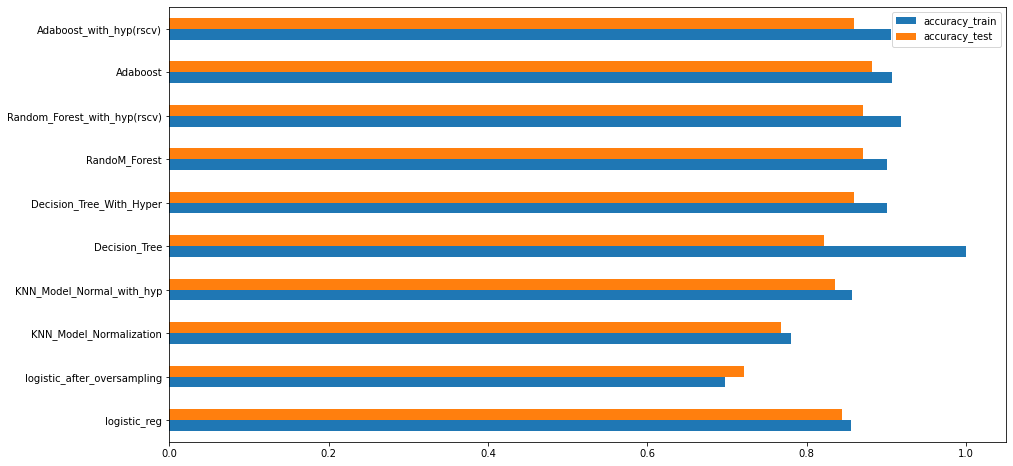

In [161]:
Final_Result_df.plot(kind = 'barh',figsize =(15,8))

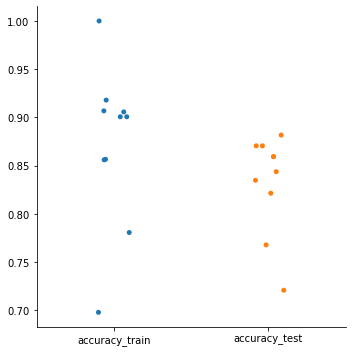

In [162]:
sns.catplot(data=Final_Result_df)

In [163]:
## testing on single row
df.head(3).T

0        1        2
ID                        5524.0   2174.0   4141.0
Year_Birth                1957.0   1954.0   1965.0
Income                   58138.0  46344.0  71613.0
Kidhome                      0.0      1.0      0.0
Teenhome                     0.0      1.0      0.0
Recency                     58.0     38.0     26.0
MntWines                   635.0     11.0    426.0
MntFruits                   88.0      1.0     49.0
MntMeatProducts            546.0      6.0    127.0
MntFishProducts            172.0      2.0    111.0
MntSweetProducts            88.0      1.0     21.0
MntGoldProds                88.0      6.0     42.0
NumDealsPurchases            3.0      2.0      1.0
NumWebPurchases              8.0      1.0      8.0
NumCatalogPurchases         10.0      1.0      2.0
NumStorePurchases            4.0      2.0     10.0
NumWebVisitsMonth            7.0      5.0      4.0
AcceptedCmp3                 0.0      0.0      0.0
AcceptedCmp4                 0.0      0.0      0.0
AcceptedCmp5                 0.0      0.0      0.0
AcceptedCmp1                 0.0      0.0      0.0
AcceptedCmp2                 0.0      0.0      0.0
Complain                     0.0      0.0      0.0
Z_CostContact                3.0      3.0      3.0
Z_Revenue                   11.0     11.0     11.0
Response                     1.0      0.0      0.0
Marital_Status_Alone         0.0      0.0      0.0
Marital_Status_Divorced      0.0      0.0      0.0
Marital_Status_Married       0.0      0.0      0.0
Marital_Status_Single        1.0      1.0      0.0
Marital_Status_Together      0.0      0.0      1.0
Marital_Status_Widow         0.0      0.0      0.0
Marital_Status_YOLO          0.0      0.0      0.0
Education_Basic              0.0      0.0      0.0
Education_Graduation         1.0      1.0      1.0
Education_Master             0.0      0.0      0.0
Education_PhD                0.0      0.0      0.0

In [164]:
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD'],
      dtype='object')

In [168]:
ID=1
Year_Birth=2000
Income=200
Kidhome=13
Teenhome=67
Recency=98
MntWines=90
MntFruits=799
MntMeatProducts=67
MntFishProducts=40
MntSweetProducts=34
MntGoldProds=9000
NumDealsPurchases=98
NumWebPurchases=25
NumCatalogPurchases=79
NumStorePurchases=30
NumWebVisitsMonth=10
AcceptedCmp3=1
AcceptedCmp4=3
AcceptedCmp5=5
AcceptedCmp1=8
AcceptedCmp2=9
Complain=987
Z_CostContact=67
Z_Revenue=45
Response=1
Marital_Status_Alone=90
Marital_Status_Divorced=78
Marital_Status_Married=34
Marital_Status_Single=23
Marital_Status_Together=87
Marital_Status_Widow=12
Marital_Status_YOLO=21
Education_Basic=13
Education_Graduation=23
Education_Master=56
Education_PhD=90

In [180]:
arr=np.zeros(37)

In [181]:
arr[0]=ID
arr[1]=Year_Birth
arr[2]=Income
arr[3]=Kidhome
arr[4]=Teenhome
arr[5]=Recency
arr[6]=MntWines
arr[7]=MntFruits
arr[8]=MntMeatProducts
arr[9]=MntFishProducts
arr[10]=MntSweetProducts
arr[11]=MntGoldProds
arr[12]=NumDealsPurchases
arr[13]=NumWebPurchases
arr[14]=NumCatalogPurchases
arr[15]=NumStorePurchases
arr[16]=NumWebVisitsMonth
arr[17]=AcceptedCmp3
arr[18]=AcceptedCmp4
arr[19]=AcceptedCmp5
arr[20]=AcceptedCmp1
arr[21]=AcceptedCmp2
arr[22]=Complain
arr[22]=Z_CostContact
arr[24]=Z_Revenue
arr[25]=Response
arr[26]=Marital_Status_Alone
arr[27]=Marital_Status_Divorced
arr[28]=Marital_Status_Married
arr[29]=Marital_Status_Single
arr[30]=Marital_Status_Together
arr[31]=Marital_Status_Widow
arr[32]=Marital_Status_YOLO
arr[33]=Education_Basic
arr[34]=Education_Graduation
arr[35]=Education_Master
arr[36]=Education_PhD

In [178]:
pred =model.predict([arr])
if pred[0]==1:
    print('Customer is purchase')
else:
    print('Customer is not purchase')

Customer is purchase


In [179]:
pred

array([1], dtype=int64)

# >>Create a Pickle File

In [186]:
import pickle as pkl

In [188]:
with open('model.pkl', 'wb') as f:
    pkl.dump(model, f)

In [189]:
with open('StandardScaler.pkl','wb') as f:
    pkl.dump(StandardScaler , f)

In [190]:
with open('MinMaxScaler.pkl','wb') as f:
    pkl.dump(MinMaxScaler , f)